In [1]:
import os 
DIR = os.path.abspath('')
DATA = os.path.join(DIR, '../Data')
PLOTS = os.path.join(DIR, '../Plots')
U = 2  # V

def rotate_labels(plot):
    for item in plot.get_xticklabels():
        item.set_rotation(45)
        
def to_log(data):
    data["log10(R)[Ohm]"] = np.log10(data["R[Ohm]"])

def to_log2(data):
    data["log2(R)[Ohm]"] = np.log2(data["R[Ohm]"])
    
def to_ln(data):
    data["ln(R)[Ohm]"] = np.log(data["R[Ohm]"])

sns.set_style("whitegrid")

ntc = pd.read_csv(os.path.join(DATA, "NTC.txt"), delim_whitespace=True)
pt = pd.read_csv(os.path.join(DATA, "PT100.txt"), delim_whitespace=True)
pt.head(3)

,T[C],R[Ohm]
0,22,910
1,30,930
2,40,950


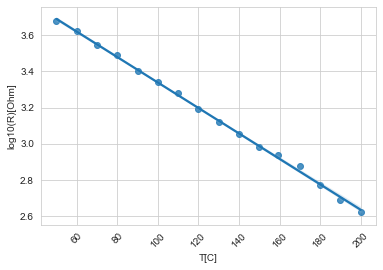

In [2]:
to_log(ntc)
p = sns.regplot(x="T[C]", y="log10(R)[Ohm]", data=ntc)
# p = sns.regplot(x="T/C", y="R/Ohm", data=ntc)
rotate_labels(p)
plt.savefig(os.path.join(PLOTS, "ntc_plot.png")) 

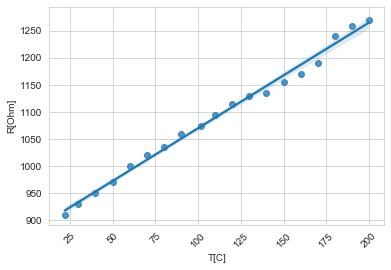

In [3]:
p = sns.regplot(x="T[C]", y="R[Ohm]", data=pt)
rotate_labels(p)
plt.savefig(os.path.join(PLOTS, "pt100_plot.png"))

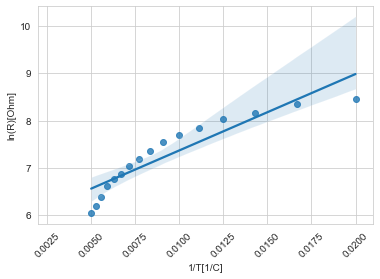

In [8]:
# Calculations
# ntc["R(T)*T / Ohm*C"] = ntc["R/Ohm [log10]"]*ntc["T/C"]
to_ln(ntc)
ntc["1/T[1/C]"] = 1/ntc["T[C]"]
p = sns.regplot(x="1/T[1/C]", y="ln(R)[Ohm]", data=ntc)
p.axes.set_xlim(0.002, 0.021)
rotate_labels(p)
plt.savefig(os.path.join(PLOTS, "ntc_plot_fit.png"))

a = 315.36, b = 161.47


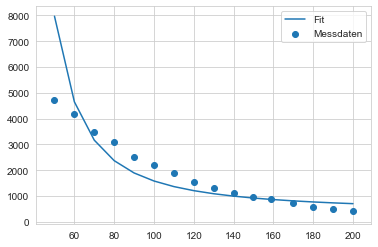

In [11]:
b, ln_a = np.polyfit(ntc["1/T[1/C]"], ntc["ln(R)[Ohm]"], 1)
a = np.exp(ln_a)
print("a = {:.2f}, b = {:.2f}".format(a, b))

plt.plot(ntc["T[C]"], a*np.exp(b/ntc["T[C]"]), label="Fit")
plt.scatter(ntc["T[C]"], ntc["R[Ohm]"], label="Messdaten")
plt.legend()

plt.savefig(os.path.join(PLOTS, "ntc_plot_exp_fit"))

Wie man sieht ist der Verlauf nicht perfekt exponentiell

c = 1.95, R0 = 874.65


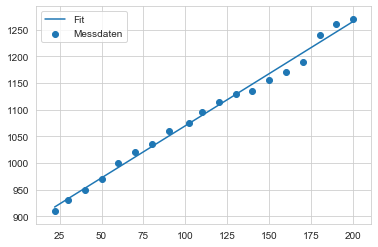

In [15]:
c, R0 = np.polyfit(pt["T[C]"], pt["R[Ohm]"], 1)
print("c = {:.2f}, R0 = {:.2f}".format(c, R0))

plt.plot(pt["T[C]"], c * pt["T[C]"] + R0, label="Fit")
plt.scatter(pt["T[C]"], pt["R[Ohm]"], label="Messdaten")
plt.legend()

# plt.savefig(os.path.join(PLOTS, "pt_plot_fit"))